In [1]:
import sklearn
import xgboost
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np 
import os 
import pandas as pd 

from sklearn.preprocessing import StandardScaler, MinMaxScaler,LabelEncoder
from sklearn import metrics, preprocessing
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from scipy import optimize as opt
from scipy.stats import zscore

# ** VERİLERİN İNCELENMESİ **

In [36]:
df_inceleme = pd.read_csv("train.csv")

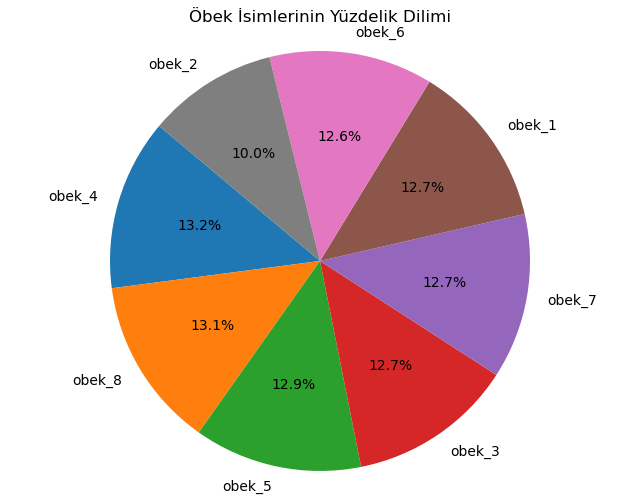

In [34]:
obek_yuzdelik = df_inceleme["Öbek İsmi"].value_counts(normalize=True) * 100

plt.figure(figsize=(8, 6))
plt.pie(obek_yuzdelik, labels=obek_yuzdelik.index, autopct='%1.1f%%', startangle=140)
plt.title("Öbek İsimlerinin Yüzdelik Dilimi")
plt.axis('equal') 
plt.show()

<Axes: xlabel='Öbek İsmi', ylabel='count'>

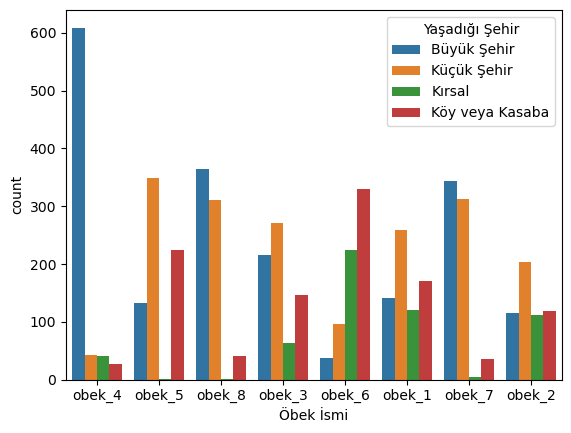

In [16]:
sns.countplot(x="Öbek İsmi",hue="Yaşadığı Şehir",data=df_inceleme)

<Axes: xlabel='Öbek İsmi', ylabel='count'>

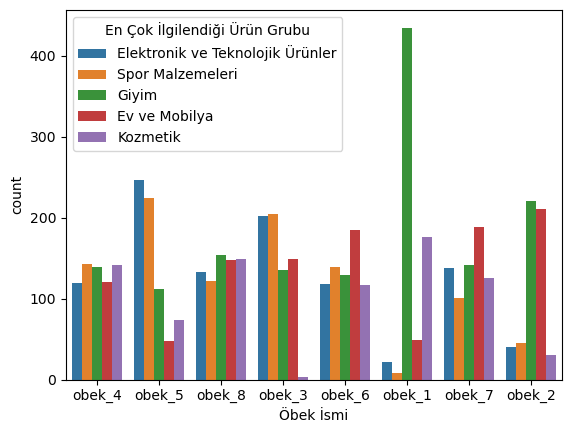

In [17]:
sns.countplot(x="Öbek İsmi",hue="En Çok İlgilendiği Ürün Grubu",data=df_inceleme)

<Axes: xlabel='Öbek İsmi', ylabel='Yıllık Ortalama Satın Alım Miktarı'>

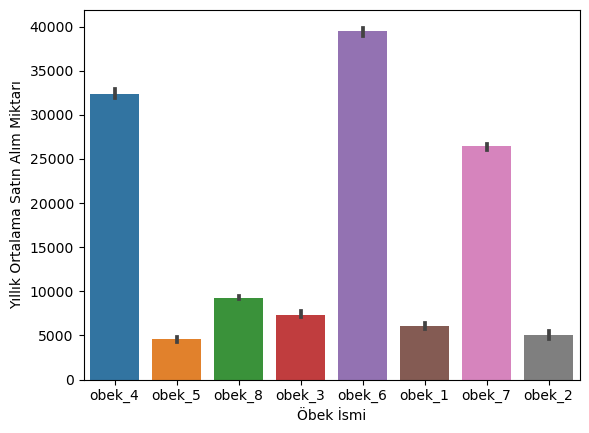

In [18]:
sns.barplot(x="Öbek İsmi",y="Yıllık Ortalama Satın Alım Miktarı",data=df_inceleme)

<Axes: xlabel='Öbek İsmi', ylabel='Yıllık Ortalama Sipariş Verilen Ürün Adedi'>

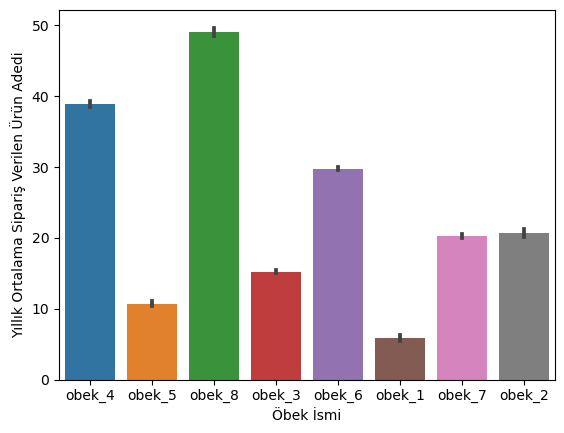

In [19]:
sns.barplot(x="Öbek İsmi",y="Yıllık Ortalama Sipariş Verilen Ürün Adedi",data=df_inceleme)

<Axes: xlabel='Öbek İsmi', ylabel='count'>

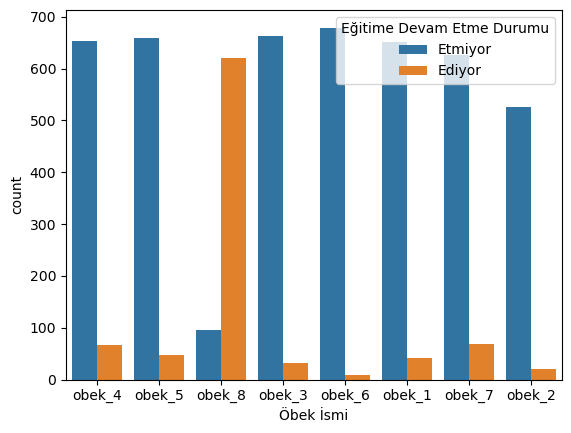

In [20]:
sns.countplot(x="Öbek İsmi",hue="Eğitime Devam Etme Durumu",data=df_inceleme)

<Axes: xlabel='Öbek İsmi', ylabel='Yıllık Ortalama Sepete Atılan Ürün Adedi'>

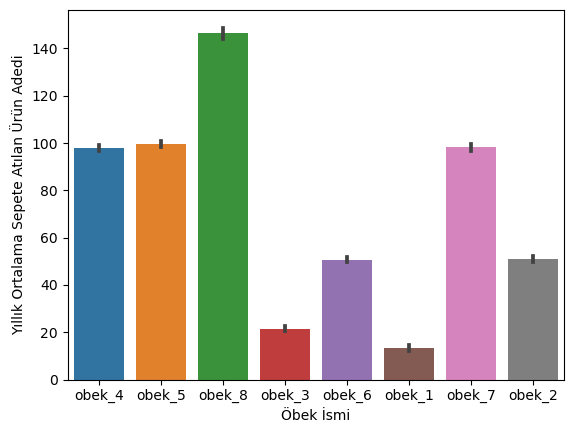

In [21]:
sns.barplot(x="Öbek İsmi",y="Yıllık Ortalama Sepete Atılan Ürün Adedi",data=df_inceleme)

<Axes: xlabel='Öbek İsmi', ylabel='count'>

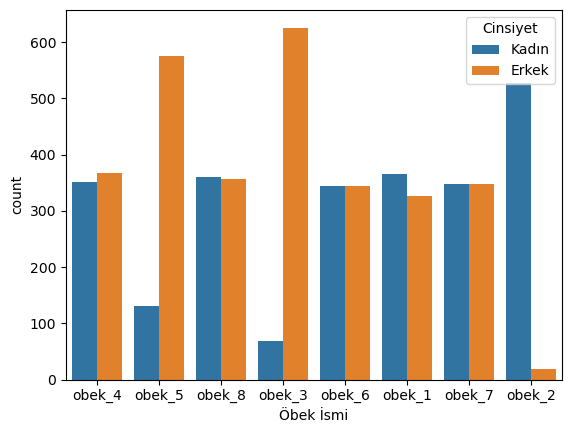

In [22]:
sns.countplot(x="Öbek İsmi", hue="Cinsiyet", data=df_inceleme)

<Axes: xlabel='Öbek İsmi', ylabel='count'>

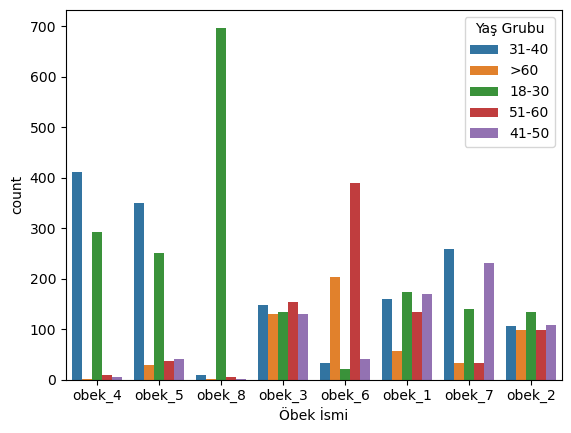

In [23]:
sns.countplot(x="Öbek İsmi",hue="Yaş Grubu",data=df_inceleme)

<Axes: xlabel='Öbek İsmi', ylabel='count'>

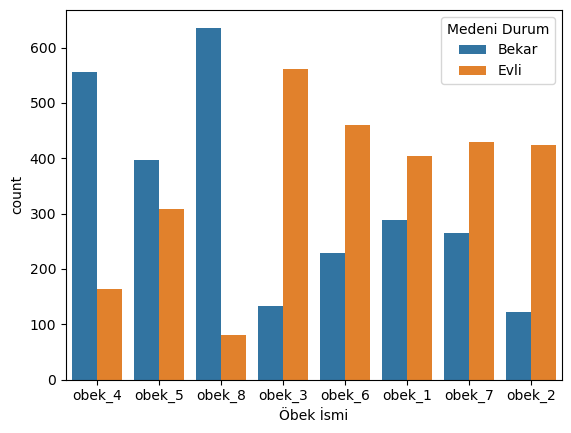

In [24]:
sns.countplot(x="Öbek İsmi",hue="Medeni Durum",data=df_inceleme)

<Axes: xlabel='Öbek İsmi', ylabel='count'>

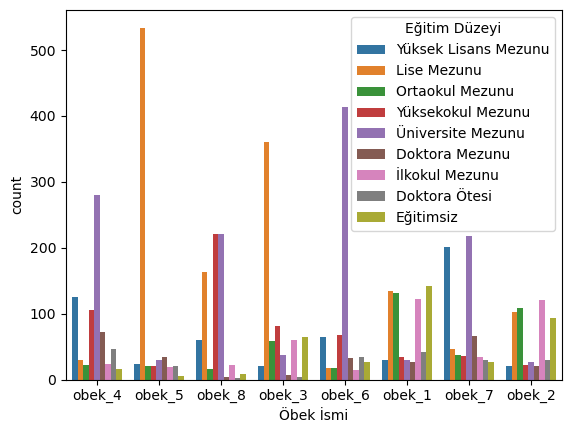

In [25]:
sns.countplot(x="Öbek İsmi",hue="Eğitim Düzeyi",data=df_inceleme)

<Axes: xlabel='Öbek İsmi', ylabel='count'>

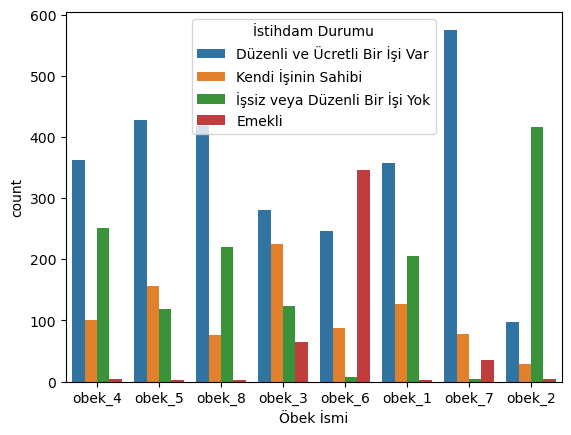

In [26]:
sns.countplot(x="Öbek İsmi",hue="İstihdam Durumu",data=df_inceleme)

<Axes: xlabel='Öbek İsmi', ylabel='Yıllık Ortalama Gelir'>

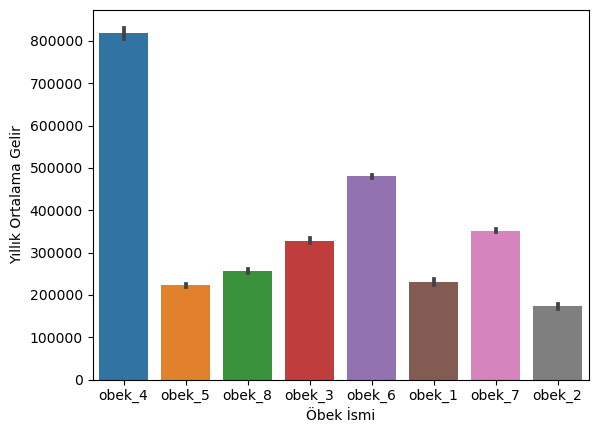

In [27]:
sns.barplot(x="Öbek İsmi",y="Yıllık Ortalama Gelir",data=df_inceleme)

# ** VERİNİN HAZIRLANMASI - ÖN İŞLEME **

In [2]:
df = pd.read_csv("train.csv")
df.head()

,index,Cinsiyet,Yaş Grubu,Medeni Durum,Eğitim Düzeyi,İstihdam Durumu,Yıllık Ortalama Gelir,Yaşadığı Şehir,En Çok İlgilendiği Ürün Grubu,Yıllık Ortalama Satın Alım Miktarı,Yıllık Ortalama Sipariş Verilen Ürün Adedi,Eğitime Devam Etme Durumu,Öbek İsmi,Yıllık Ortalama Sepete Atılan Ürün Adedi
0,0,Kadın,31-40,Bekar,Yüksek Lisans Mezunu,Düzenli ve Ücretli Bir İşi Var,748266.440879,Büyük Şehir,Elektronik ve Teknolojik Ürünler,32010.900881,37.310644,Etmiyor,obek_4,102.936904
1,1,Erkek,>60,Evli,Lise Mezunu,Kendi İşinin Sahibi,246298.609605,Küçük Şehir,Spor Malzemeleri,4145.729891,11.554851,Etmiyor,obek_5,82.176053
2,2,Erkek,18-30,Bekar,Lise Mezunu,Düzenli ve Ücretli Bir İşi Var,268582.732360,Küçük Şehir,Giyim,9924.379414,55.353236,Ediyor,obek_8,141.661426
3,3,Erkek,51-60,Evli,Lise Mezunu,Kendi İşinin Sahibi,327721.837865,Kırsal,Giyim,6417.780714,15.417239,Etmiyor,obek_3,17.097397
4,4,Erkek,31-40,Evli,Ortaokul Mezunu,İşsiz veya Düzenli Bir İşi Yok,397431.626948,Büyük Şehir,Giyim,7886.663061,14.689837,Etmiyor,obek_3,20.470459


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5460 entries, 0 to 5459
Data columns (total 14 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   index                                       5460 non-null   int64  
 1   Cinsiyet                                    5460 non-null   object 
 2   Yaş Grubu                                   5460 non-null   object 
 3   Medeni Durum                                5460 non-null   object 
 4   Eğitim Düzeyi                               5460 non-null   object 
 5   İstihdam Durumu                             5460 non-null   object 
 6   Yıllık Ortalama Gelir                       5460 non-null   float64
 7   Yaşadığı Şehir                              5460 non-null   object 
 8   En Çok İlgilendiği Ürün Grubu               5460 non-null   object 
 9   Yıllık Ortalama Satın Alım Miktarı          5460 non-null   float64
 10  Yıllık Ortal

# Yıllık Ortalama Gelir Outlier Temizliği


In [4]:
array2 = df["Yıllık Ortalama Gelir"].values
threshold = 3
z_scores = np.abs(zscore(array2))
outlier_indices = np.where(z_scores > threshold)
cleaned_df = df[(z_scores <= threshold)]
df = cleaned_df
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5399 entries, 0 to 5459
Data columns (total 14 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   index                                       5399 non-null   int64  
 1   Cinsiyet                                    5399 non-null   object 
 2   Yaş Grubu                                   5399 non-null   object 
 3   Medeni Durum                                5399 non-null   object 
 4   Eğitim Düzeyi                               5399 non-null   object 
 5   İstihdam Durumu                             5399 non-null   object 
 6   Yıllık Ortalama Gelir                       5399 non-null   float64
 7   Yaşadığı Şehir                              5399 non-null   object 
 8   En Çok İlgilendiği Ürün Grubu               5399 non-null   object 
 9   Yıllık Ortalama Satın Alım Miktarı          5399 non-null   float64
 10  Yıllık Ortal

# Yıllık Ortalama Satın Alım Miktarı Outlier Temizliği

In [5]:
array3 = df["Yıllık Ortalama Satın Alım Miktarı"].values
threshold = 3
z_scores2 = np.abs(zscore(array3))
outlier_indices = np.where(z_scores2 > threshold)
cleaned_df = df[(z_scores2 <= threshold)]
df = cleaned_df
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5399 entries, 0 to 5459
Data columns (total 14 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   index                                       5399 non-null   int64  
 1   Cinsiyet                                    5399 non-null   object 
 2   Yaş Grubu                                   5399 non-null   object 
 3   Medeni Durum                                5399 non-null   object 
 4   Eğitim Düzeyi                               5399 non-null   object 
 5   İstihdam Durumu                             5399 non-null   object 
 6   Yıllık Ortalama Gelir                       5399 non-null   float64
 7   Yaşadığı Şehir                              5399 non-null   object 
 8   En Çok İlgilendiği Ürün Grubu               5399 non-null   object 
 9   Yıllık Ortalama Satın Alım Miktarı          5399 non-null   float64
 10  Yıllık Ortal

# Yıllık Ortalama Sepete Atılan Ürün Adedi Outlier Temizliği

In [6]:
array4 = df["Yıllık Ortalama Sepete Atılan Ürün Adedi"].values
threshold = 3
z_scores3 = np.abs(zscore(array4))
outlier_indices = np.where(z_scores3 > threshold)
cleaned_df = df[(z_scores3 <= threshold)]
df = cleaned_df
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5388 entries, 0 to 5459
Data columns (total 14 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   index                                       5388 non-null   int64  
 1   Cinsiyet                                    5388 non-null   object 
 2   Yaş Grubu                                   5388 non-null   object 
 3   Medeni Durum                                5388 non-null   object 
 4   Eğitim Düzeyi                               5388 non-null   object 
 5   İstihdam Durumu                             5388 non-null   object 
 6   Yıllık Ortalama Gelir                       5388 non-null   float64
 7   Yaşadığı Şehir                              5388 non-null   object 
 8   En Çok İlgilendiği Ürün Grubu               5388 non-null   object 
 9   Yıllık Ortalama Satın Alım Miktarı          5388 non-null   float64
 10  Yıllık Ortal

# Yıllık Ortalama Sipariş Verilen Ürün Adedi Outlier Temizliği

In [7]:
array5 = df["Yıllık Ortalama Sipariş Verilen Ürün Adedi"].values
threshold = 3
z_scores5 = np.abs(zscore(array5))
outlier_indices = np.where(z_scores5 > threshold)
cleaned_df = df[(z_scores5 <= threshold)]
df = cleaned_df
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5388 entries, 0 to 5459
Data columns (total 14 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   index                                       5388 non-null   int64  
 1   Cinsiyet                                    5388 non-null   object 
 2   Yaş Grubu                                   5388 non-null   object 
 3   Medeni Durum                                5388 non-null   object 
 4   Eğitim Düzeyi                               5388 non-null   object 
 5   İstihdam Durumu                             5388 non-null   object 
 6   Yıllık Ortalama Gelir                       5388 non-null   float64
 7   Yaşadığı Şehir                              5388 non-null   object 
 8   En Çok İlgilendiği Ürün Grubu               5388 non-null   object 
 9   Yıllık Ortalama Satın Alım Miktarı          5388 non-null   float64
 10  Yıllık Ortal

# One-Hot Encoding Gereken Değişkenlerin İşlenmesi

In [8]:
columns_to_encode = ["Cinsiyet"
                     ,"Medeni Durum"
                     ,"İstihdam Durumu"
                     ,"Yaşadığı Şehir"
                     ,"En Çok İlgilendiği Ürün Grubu"
                     ,"Eğitime Devam Etme Durumu"]

df_encoded = pd.get_dummies(df, columns=columns_to_encode)
df_encoded.head()

,index,Yaş Grubu,Eğitim Düzeyi,Yıllık Ortalama Gelir,Yıllık Ortalama Satın Alım Miktarı,Yıllık Ortalama Sipariş Verilen Ürün Adedi,Öbek İsmi,Yıllık Ortalama Sepete Atılan Ürün Adedi,Cinsiyet_Erkek,Cinsiyet_Kadın,...,Yaşadığı Şehir_Köy veya Kasaba,Yaşadığı Şehir_Küçük Şehir,Yaşadığı Şehir_Kırsal,En Çok İlgilendiği Ürün Grubu_Elektronik ve Teknolojik Ürünler,En Çok İlgilendiği Ürün Grubu_Ev ve Mobilya,En Çok İlgilendiği Ürün Grubu_Giyim,En Çok İlgilendiği Ürün Grubu_Kozmetik,En Çok İlgilendiği Ürün Grubu_Spor Malzemeleri,Eğitime Devam Etme Durumu_Ediyor,Eğitime Devam Etme Durumu_Etmiyor
0,0,31-40,Yüksek Lisans Mezunu,748266.440879,32010.900881,37.310644,obek_4,102.936904,0,1,...,0,0,0,1,0,0,0,0,0,1
1,1,>60,Lise Mezunu,246298.609605,4145.729891,11.554851,obek_5,82.176053,1,0,...,0,1,0,0,0,0,0,1,0,1
2,2,18-30,Lise Mezunu,268582.732360,9924.379414,55.353236,obek_8,141.661426,1,0,...,0,1,0,0,0,1,0,0,1,0
3,3,51-60,Lise Mezunu,327721.837865,6417.780714,15.417239,obek_3,17.097397,1,0,...,0,0,1,0,0,1,0,0,0,1
4,4,31-40,Ortaokul Mezunu,397431.626948,7886.663061,14.689837,obek_3,20.470459,1,0,...,0,0,0,0,0,1,0,0,0,1


# Label Encoding Gereken Değişkenlerin İşlenmesi

In [9]:
#Mapping içeriğinin hazırlanması

education_mapping = {"Eğitimsiz": 0, "İlkokul Mezunu": 1,
                     "Ortaokul Mezunu": 2, "Lise Mezunu": 3,
                     "Yüksekokul Mezunu":4,"Üniversite Mezunu":5,
                     "Yüksek Lisans Mezunu":6,"Doktora Mezunu":7, "Doktora Ötesi":8}
group_mapping = {"obek_1": 0, "obek_2": 1, "obek_3": 2, "obek_4": 3, "obek_5": 4,
                 "obek_6":5, "obek_7":6, "obek_8":7}
inverse_group_mapping = {0: 'obek_1',
 1: 'obek_2',
 2: 'obek_3',
 3: 'obek_4',
 4: 'obek_5',
 5: 'obek_6',
 6: 'obek_7',
 7: 'obek_8'}
age_mapping = {"18-30": 0, "31-40": 1, "41-50": 2, "51-60": 3, ">60": 4}


#Mapping işlemi

df_encoded["Eğitim Düzeyi"] = df_encoded["Eğitim Düzeyi"].map(education_mapping)
df_encoded["Öbek İsmi"] = df_encoded["Öbek İsmi"].map(group_mapping)
df_encoded["Yaş Grubu"] = df_encoded["Yaş Grubu"].map(age_mapping)


# MinMaxScaler ile Scale İşlemi

In [10]:
columns_to_minmax =["Yıllık Ortalama Gelir",
                    "Yıllık Ortalama Satın Alım Miktarı",
                    "Yıllık Ortalama Sepete Atılan Ürün Adedi",
                    "Yıllık Ortalama Sipariş Verilen Ürün Adedi"]
scaler = MinMaxScaler()
df_encoded[columns_to_minmax] = scaler.fit_transform(df_encoded[columns_to_minmax])
df_encoded.head()

,index,Yaş Grubu,Eğitim Düzeyi,Yıllık Ortalama Gelir,Yıllık Ortalama Satın Alım Miktarı,Yıllık Ortalama Sipariş Verilen Ürün Adedi,Öbek İsmi,Yıllık Ortalama Sepete Atılan Ürün Adedi,Cinsiyet_Erkek,Cinsiyet_Kadın,...,Yaşadığı Şehir_Köy veya Kasaba,Yaşadığı Şehir_Küçük Şehir,Yaşadığı Şehir_Kırsal,En Çok İlgilendiği Ürün Grubu_Elektronik ve Teknolojik Ürünler,En Çok İlgilendiği Ürün Grubu_Ev ve Mobilya,En Çok İlgilendiği Ürün Grubu_Giyim,En Çok İlgilendiği Ürün Grubu_Kozmetik,En Çok İlgilendiği Ürün Grubu_Spor Malzemeleri,Eğitime Devam Etme Durumu_Ediyor,Eğitime Devam Etme Durumu_Etmiyor
0,0,1,6,0.719791,0.637245,0.577419,3,0.471992,0,1,...,0,0,0,1,0,0,0,0,0,1
1,1,4,3,0.206814,0.028122,0.178823,4,0.372972,1,0,...,0,1,0,0,0,0,0,1,0,1
2,2,0,3,0.229587,0.154441,0.856646,7,0.656691,1,0,...,0,1,0,0,0,1,0,0,1,0
3,3,3,3,0.290023,0.077788,0.238597,2,0.062576,1,0,...,0,0,1,0,0,1,0,0,0,1
4,4,1,2,0.361262,0.109898,0.227340,2,0.078664,1,0,...,0,0,0,0,0,1,0,0,0,1


# Test ve Train Setinin Ayrılması

In [11]:
x= df_encoded.drop(["Öbek İsmi"],axis=1)
y= df_encoded["Öbek İsmi"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

# ** MODEL EĞİTİM VE TEST AŞAMASI **

# Adaboost

In [37]:
adaBoost = AdaBoostClassifier(DecisionTreeClassifier(max_depth=3),n_estimators=100,learning_rate=0.11,random_state=42)
adaBoost.fit(x_train, y_train)
y_pred_train_adaboost = adaBoost.predict(x_train)
y_pred_adaboost = adaBoost.predict(x_test)
print("AdaBoost Train Accuracy:", accuracy_score(y_train, y_pred_train_adaboost))
print("Test accuracy:", format(accuracy_score(y_test, y_pred_adaboost)))

AdaBoost Train Accuracy: 0.9544667161593665
Test accuracy: 0.9561989606533037


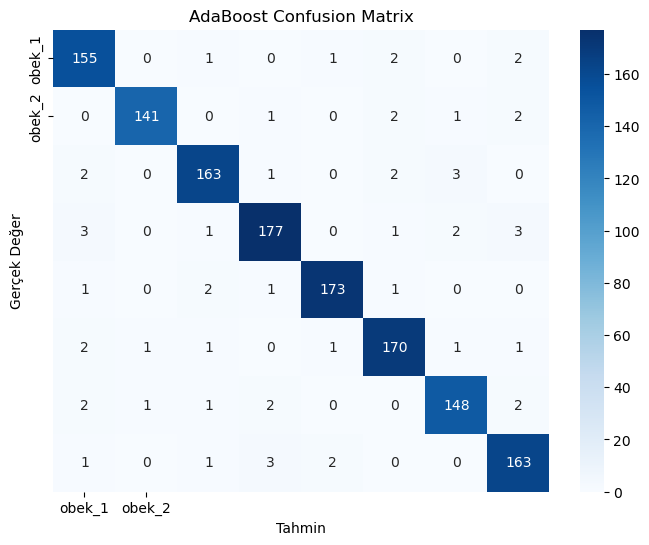

In [15]:
cm = confusion_matrix(y_test, y_pred_adaboost)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['obek_1', 'obek_2'], yticklabels=['obek_1', 'obek_2'])
plt.xlabel('Tahmin')
plt.ylabel('Gerçek Değer')
plt.title('AdaBoost Confusion Matrix')
plt.show()

# RandomForest

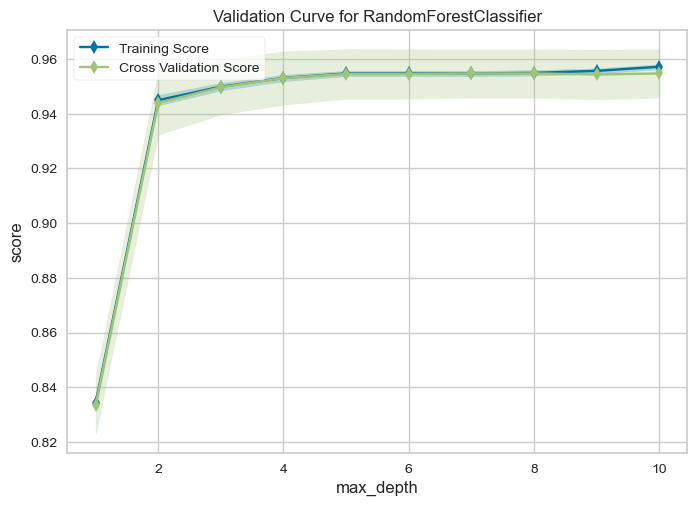

ValidationCurve(ax=<Axes: title={'center': 'Validation Curve for RandomForestClassifier'}, xlabel='max_depth', ylabel='score'>,
                cv=10, estimator=RandomForestClassifier(random_state=42),
                n_jobs=-1, param_name='max_depth',
                param_range=array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
                scoring='accuracy')


In [41]:
#maxdepth için ideal değeri bulma denemesi

from yellowbrick.model_selection import validation_curve 
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)
rfc = RandomForestClassifier(random_state=42)
rfc.fit(x_train, y_train)
y_pred = rfc.predict(x_test) # Predictions
y_true = y_test # True values

print(validation_curve(rfc, x, y, 
                       param_name="max_depth", n_jobs=-1,
                       param_range=np.arange(1, 11), 
                       cv=10, scoring="accuracy"))

In [ ]:
# max_depth = 8 değerinden sonra overfitting başladığı görüldü, değer buna göre seçildi

In [13]:
forest = RandomForestClassifier(
    random_state=42
    ,n_estimators = 110
    ,max_depth = 8
)
forest.fit(x_train, y_train)

RandomForestClassifier(max_depth=8, n_estimators=110, random_state=42)

In [14]:
# Train seti
y_pred_train_forest = forest.predict(x_train)
accuracy_train = accuracy_score(y_train, y_pred_train_forest)
print(f"Train seti accuracy: {accuracy_train:.5f}")

# Test seti
y_pred_test_forest = forest.predict(x_test)
accuracy_test = accuracy_score(y_test, y_pred_test_forest)
print(f"Test seti accuracy: {accuracy_test:.5f}")

Train seti accuracy: 0.95422
Test seti accuracy: 0.95768


In [ ]:
Train seti accuracy: 0.95397
Test seti accuracy: 0.95768

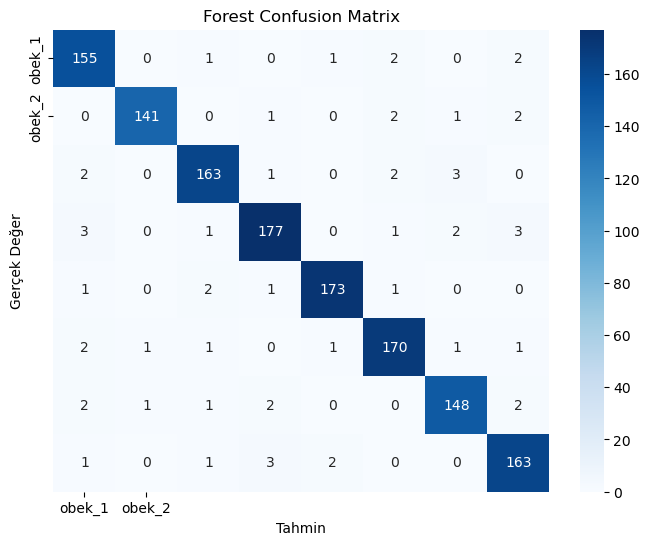

In [18]:
cm = confusion_matrix(y_test, y_pred_test_forest)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['obek_1', 'obek_2'], yticklabels=['obek_1', 'obek_2'])
plt.xlabel('Tahmin')
plt.ylabel('Gerçek Değer')
plt.title('Forest Confusion Matrix')
plt.show()

# SVM

In [19]:
#SVM için StandardScaler kullanımı gerekiyor
scaler = StandardScaler()
x_train_svm = scaler.fit_transform(x_train)
x_test_svm = scaler.fit_transform(x_test)

#obek_2 içerisindeki veri miktarı daha az olduğu için class weight adjusment denendi.

class_weights = {0: 0.12, 1: 0.16, 2:0.12, 3:0.12, 4:0.12, 5:0.12, 6:0.12, 7:0.12}  
svm_classifier = SVC(kernel='linear', class_weight=class_weights, random_state=42)
svm_classifier.fit(x_train_svm, y_train)

SVC(class_weight={0: 0.12, 1: 0.16, 2: 0.12, 3: 0.12, 4: 0.12, 5: 0.12, 6: 0.12,
                  7: 0.12},
    kernel='linear', random_state=42)

In [20]:
#Tahminler
y_pred_test_svm = svm_classifier.predict(x_test_svm)
y_pred_train_svm = svm_classifier.predict(x_train_svm)

#Accuracy Ölçümü
print(f"Train Accuracy: {accuracy_score(y_train, y_pred_train_svm):.5f}")
print(f"Test Accuracy: {accuracy_score(y_test, y_pred_test_svm):.5f}")

Train Accuracy: 0.95174
Test Accuracy: 0.95546


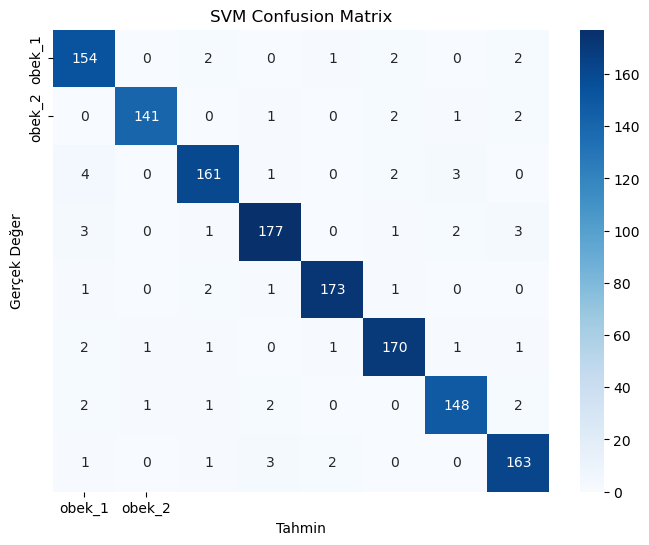

In [21]:
cm = confusion_matrix(y_test, y_pred_test_svm)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['obek_1', 'obek_2'], yticklabels=['obek_1', 'obek_2'])
plt.xlabel('Tahmin')
plt.ylabel('Gerçek Değer')
plt.title('SVM Confusion Matrix')
plt.show()

# "test_x.csv" Dosyasındaki Verilerin Tahmini

In [59]:
TEST_df = pd.read_csv("test_x.csv")

In [60]:
#One-hot Encoding İşlemi
columns_to_encode = ["Cinsiyet"
                     ,"Medeni Durum"
                     ,"İstihdam Durumu"
                     ,"Yaşadığı Şehir"
                     ,"En Çok İlgilendiği Ürün Grubu"
                     ,"Eğitime Devam Etme Durumu"]
TEST_df_encoded = pd.get_dummies(TEST_df, columns=columns_to_encode)

#Label Encoding (Mapping)
TEST_df_encoded["Eğitim Düzeyi"] = TEST_df_encoded["Eğitim Düzeyi"].map(education_mapping)
TEST_df_encoded["Yaş Grubu"] = TEST_df_encoded["Yaş Grubu"].map(age_mapping)

#Ölçeklendirme İşlemi
columns_to_minmax =["Yıllık Ortalama Gelir",
                    "Yıllık Ortalama Satın Alım Miktarı",
                    "Yıllık Ortalama Sepete Atılan Ürün Adedi",
                    "Yıllık Ortalama Sipariş Verilen Ürün Adedi"]
scaler = MinMaxScaler()
TEST_df_encoded[columns_to_minmax] = scaler.fit_transform(TEST_df_encoded[columns_to_minmax])


TEST_df_encoded.head()

,index,Yaş Grubu,Eğitim Düzeyi,Yıllık Ortalama Gelir,Yıllık Ortalama Satın Alım Miktarı,Yıllık Ortalama Sipariş Verilen Ürün Adedi,Yıllık Ortalama Sepete Atılan Ürün Adedi,Cinsiyet_Erkek,Cinsiyet_Kadın,Medeni Durum_Bekar,...,Yaşadığı Şehir_Köy veya Kasaba,Yaşadığı Şehir_Küçük Şehir,Yaşadığı Şehir_Kırsal,En Çok İlgilendiği Ürün Grubu_Elektronik ve Teknolojik Ürünler,En Çok İlgilendiği Ürün Grubu_Ev ve Mobilya,En Çok İlgilendiği Ürün Grubu_Giyim,En Çok İlgilendiği Ürün Grubu_Kozmetik,En Çok İlgilendiği Ürün Grubu_Spor Malzemeleri,Eğitime Devam Etme Durumu_Ediyor,Eğitime Devam Etme Durumu_Etmiyor
0,0,3,6,0.247815,0.061961,0.241225,0.061780,1,0,0,...,1,0,0,0,0,1,0,0,0,1
1,1,2,3,0.290964,0.089316,0.233643,0.061906,1,0,1,...,0,0,0,0,0,0,0,1,0,1
2,2,4,0,0.062824,0.037308,0.170390,0.179026,0,1,0,...,0,1,0,0,0,1,0,0,0,1
3,3,3,8,0.355516,0.914734,0.505066,0.184098,0,1,0,...,1,0,0,0,0,0,1,0,0,1
4,4,0,6,0.211517,0.070986,0.070605,0.032126,1,0,0,...,0,1,0,0,0,1,0,0,0,1


In [62]:
forest_Tahmin = forest.predict(TEST_df_encoded)
forest_Tahmin2= pd.DataFrame()
forest_Tahmin2["Öbek İsmi"] = pd.DataFrame(forest_Tahmin)
forest_Tahmin2["Öbek İsmi"] = forest_Tahmin2["Öbek İsmi"].map(inverse_group_mapping)
forest_Tahmin2

,Öbek İsmi
0,obek_3
1,obek_3
2,obek_2
3,obek_6
4,obek_1
...,...
2335,obek_8
2336,obek_2
2337,obek_7
2338,obek_5


In [67]:
veri = {
    'id': range(2340),
    'Öbek İsmi': forest_Tahmin2["Öbek İsmi"]
}
Tahmin_Dataframe = pd.DataFrame(veri)
Tahmin_Dataframe.set_index('id', inplace=True)

Tahmin_Dataframe.to_csv('forest_3tol.csv')